<a href="https://colab.research.google.com/github/plaban1981/DEEP-LEARNING-/blob/master/Multiclass_Classification_using_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Abstract

Rock Paper Scissors is a dataset containing 2,892 images of diverse hands in Rock/Paper/Scissors poses. It is licensed CC By 2.0 and available for all purposes, but it’s intent is primarily for learning and research.

#Overview

Rock Paper Scissors contains images from a variety of different hands,  from different races, ages and genders, posed into Rock / Paper or Scissors and labelled as such. You can download the training set here, and the test set here. These images have all been generated using CGI techniques as an experiment in determining if a CGI-based dataset can be used for classification against real images. I also generated a few images that you can use for predictions. You can find them here.

Note that all of this data is posed against a white background.

Each image is 300×300 pixels in 24-bit color

## Load Training dta

In [3]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
    -O /tmp/rps.zip

--2019-07-27 14:33:06--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.141.128, 2607:f8b0:400c:c06::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M   162MB/s    in 1.2s    

2019-07-27 14:33:08 (162 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]



## Load Test data

In [4]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
    -O /tmp/rps-test-set.zip

--2019-07-27 14:33:34--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.141.128, 2607:f8b0:400c:c06::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘/tmp/rps-test-set.zip’

/tmp/rps-test-set.z 100%[===================>]  28.15M   152MB/s    in 0.2s    

2019-07-27 14:33:34 (152 MB/s) - ‘/tmp/rps-test-set.zip’ saved [29516758/29516758]



## Create Training and Test Folders

In [0]:
import os
import zipfile

local_zip = '/tmp/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

local_zip = '/tmp/rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

## Set up data directories

In [6]:
rock_dir = os.path.join('/tmp/rps/rock')
paper_dir = os.path.join('/tmp/rps/paper')
scissors_dir = os.path.join('/tmp/rps/scissors')
print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

total training rock images: 840
total training paper images: 840
total training scissors images: 840


In [7]:
rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

['rock04-113.png', 'rock02-113.png', 'rock07-k03-053.png', 'rock05ck01-104.png', 'rock05ck01-022.png', 'rock02-109.png', 'rock01-017.png', 'rock03-113.png', 'rock01-001.png', 'rock01-114.png']
['paper05-067.png', 'paper03-062.png', 'paper05-091.png', 'paper01-094.png', 'paper03-111.png', 'paper05-105.png', 'paper01-002.png', 'paper01-040.png', 'paper03-045.png', 'paper02-045.png']
['testscissors02-100.png', 'testscissors01-040.png', 'testscissors03-062.png', 'scissors01-020.png', 'scissors02-009.png', 'testscissors02-041.png', 'testscissors01-097.png', 'scissors04-101.png', 'testscissors01-045.png', 'testscissors02-117.png']


## Visualization of images

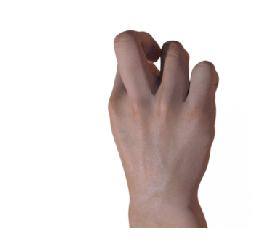

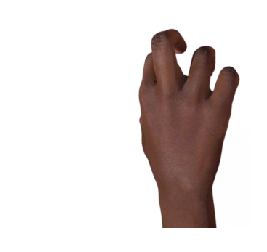

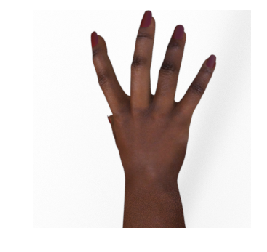

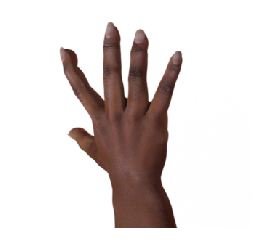

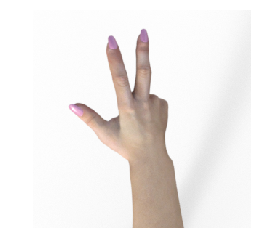

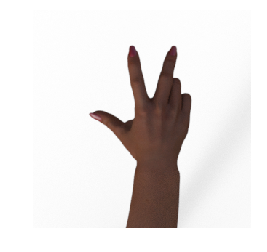

In [8]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_rock = [os.path.join(rock_dir, fname) 
                for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname) 
                for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname) 
                for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  #print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

## import keras libraries

In [0]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

## Image Augmentation

In [10]:
TRAINING_DIR = "/tmp/rps/"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	  rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "/tmp/rps-test-set/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical'
)


Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


## Build Model

In [11]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])


model.summary()

W0727 14:49:51.819611 140367560910720 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

## Compile the Model

In [0]:
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

## Train the Model

In [13]:
history = model.fit_generator(train_generator, epochs=25, validation_data = validation_generator, verbose = 1)

Epoch 1/25
79/79 [==============================] - 28s 354ms/step - loss: 1.1350 - acc: 0.3806 - val_loss: 0.9219 - val_acc: 0.8925
Epoch 2/25
79/79 [==============================] - 25s 316ms/step - loss: 0.8997 - acc: 0.5980 - val_loss: 0.4176 - val_acc: 0.9113
Epoch 3/25
79/79 [==============================] - 25s 321ms/step - loss: 0.5647 - acc: 0.7698 - val_loss: 0.6784 - val_acc: 0.6290
Epoch 4/25
79/79 [==============================] - 25s 318ms/step - loss: 0.3784 - acc: 0.8571 - val_loss: 0.0739 - val_acc: 0.9839
Epoch 5/25
79/79 [==============================] - 25s 320ms/step - loss: 0.3422 - acc: 0.8730 - val_loss: 0.0597 - val_acc: 0.9919
Epoch 6/25
79/79 [==============================] - 25s 316ms/step - loss: 0.2462 - acc: 0.9143 - val_loss: 0.1281 - val_acc: 0.9435
Epoch 7/25
79/79 [==============================] - 25s 321ms/step - loss: 0.2081 - acc: 0.9230 - val_loss: 0.1581 - val_acc: 0.9140
Epoch 8/25
79/79 [==============================] - 25s 315ms/step - 

## Visualization - Accuracy and Loss

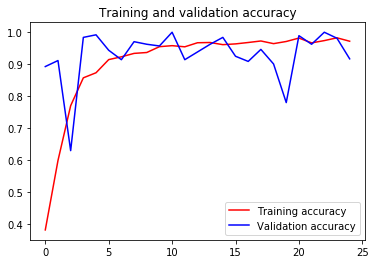

<Figure size 432x288 with 0 Axes>

In [14]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

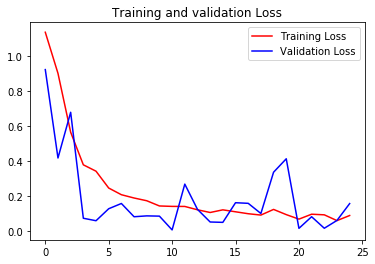

<Figure size 432x288 with 0 Axes>

In [15]:
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation Loss')
plt.legend(loc=0)
plt.figure()


plt.show()

## Predictions - Unseen Images

Saving paper1.png to paper1.png
Saving paper2.png to paper2.png
Saving paper3.png to paper3.png
Saving paper4.png to paper4.png
Saving paper5.png to paper5 (2).png
Saving paper6.png to paper6.png
Saving paper7.png to paper7 (1).png
Saving paper8.png to paper8.png
Saving paper9.png to paper9.png
Saving paper-hires1.png to paper-hires1.png
Saving paper-hires2.png to paper-hires2.png
Saving rock1.png to rock1.png
Saving rock2.png to rock2.png
Saving rock3.png to rock3.png
Saving rock4.png to rock4.png
Saving rock5.png to rock5.png
Saving rock6.png to rock6.png
Saving rock7.png to rock7.png
Saving rock8.png to rock8.png
Saving rock9.png to rock9.png
Saving rock-hires1.png to rock-hires1 (1).png
Saving rock-hires2.png to rock-hires2.png
Saving scissors1.png to scissors1 (1).png
Saving scissors2.png to scissors2.png
Saving scissors3.png to scissors3.png
Saving scissors4.png to scissors4.png
Saving scissors5.png to scissors5.png
Saving scissors6.png to scissors6.png
Saving scissors7.png to sc

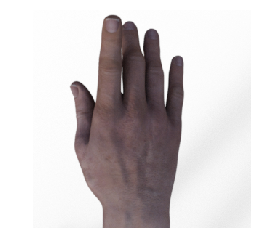

paper1.png is identified as paper
paper2.png
[[1. 0. 0.]]


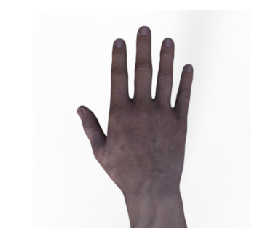

paper2.png is identified as paper
paper3.png
[[1. 0. 0.]]


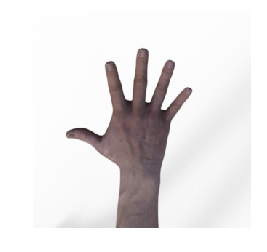

paper3.png is identified as paper
paper4.png
[[1. 0. 0.]]


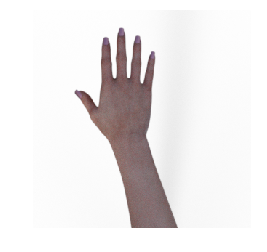

paper4.png is identified as paper
paper5.png
[[1. 0. 0.]]


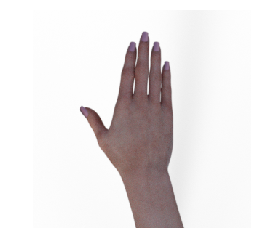

paper5.png is identified as paper
paper6.png
[[1. 0. 0.]]


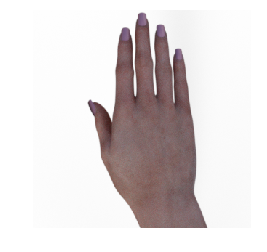

paper6.png is identified as paper
paper7.png
[[1. 0. 0.]]


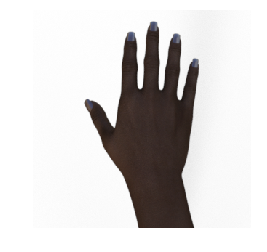

paper7.png is identified as paper
paper8.png
[[1. 0. 0.]]


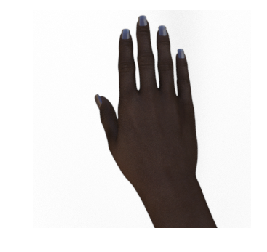

paper8.png is identified as paper
paper9.png
[[1. 0. 0.]]


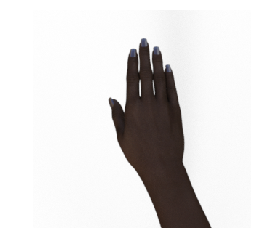

paper9.png is identified as paper
paper-hires1.png
[[1. 0. 0.]]


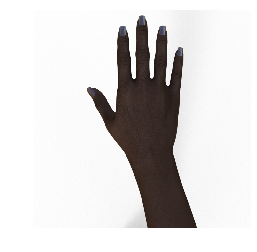

paper-hires1.png is identified as paper
paper-hires2.png
[[1. 0. 0.]]


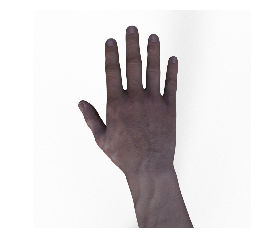

paper-hires2.png is identified as paper
rock1.png
[[0. 1. 0.]]


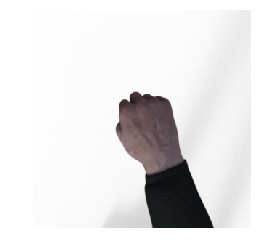

rock1.png is identified as rock
rock2.png
[[0. 1. 0.]]


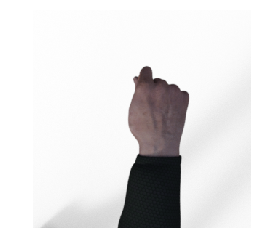

rock2.png is identified as rock
rock3.png
[[0. 1. 0.]]


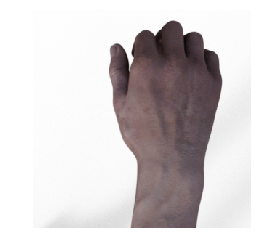

rock3.png is identified as rock
rock4.png
[[0. 1. 0.]]


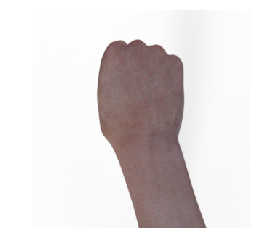

rock4.png is identified as rock
rock5.png
[[0. 1. 0.]]


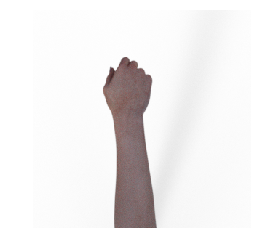

rock5.png is identified as rock
rock6.png
[[0. 1. 0.]]


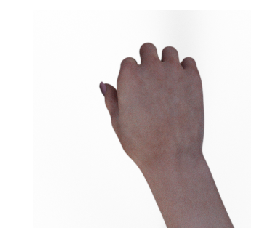

rock6.png is identified as rock
rock7.png
[[0. 1. 0.]]


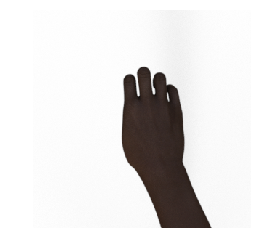

rock7.png is identified as rock
rock8.png
[[0. 1. 0.]]


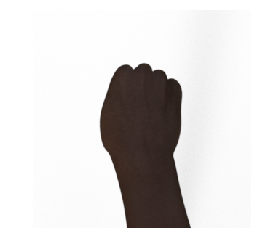

rock8.png is identified as rock
rock9.png
[[0. 1. 0.]]


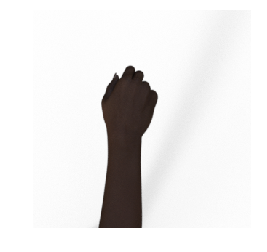

rock9.png is identified as rock
rock-hires1.png
[[0. 1. 0.]]


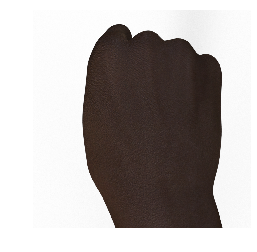

rock-hires1.png is identified as rock
rock-hires2.png
[[0. 1. 0.]]


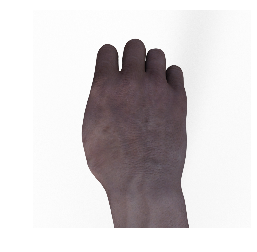

rock-hires2.png is identified as rock
scissors1.png
[[0. 0. 1.]]


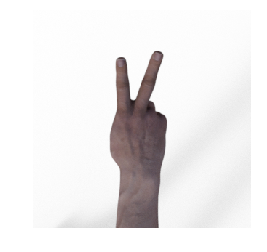

scissors1.png is identified as scissor
scissors2.png
[[0. 0. 1.]]


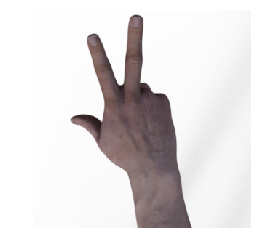

scissors2.png is identified as scissor
scissors3.png
[[0. 0. 1.]]


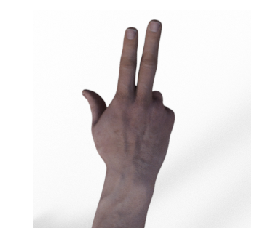

scissors3.png is identified as scissor
scissors4.png
[[0. 0. 1.]]


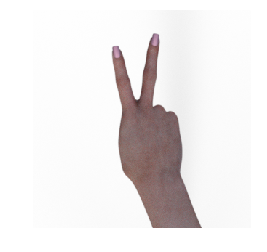

scissors4.png is identified as scissor
scissors5.png
[[0. 0. 1.]]


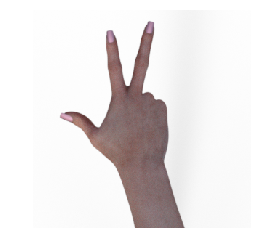

scissors5.png is identified as scissor
scissors6.png
[[0. 0. 1.]]


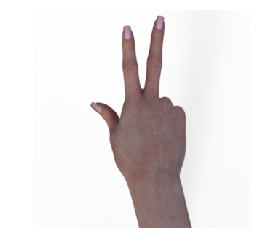

scissors6.png is identified as scissor
scissors7.png
[[0. 0. 1.]]


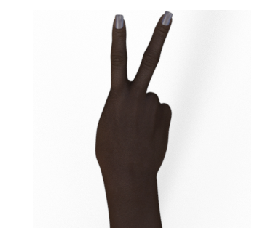

scissors7.png is identified as scissor
scissors8.png
[[0. 0. 1.]]


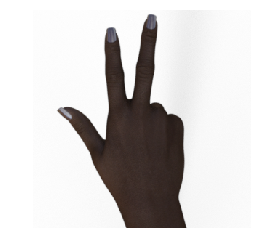

scissors8.png is identified as scissor
scissors9.png
[[0. 0. 1.]]


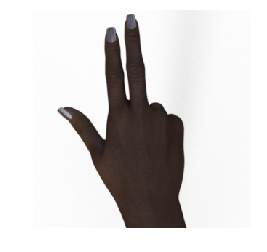

scissors9.png is identified as scissor
scissors-hires1.png
[[0. 0. 1.]]


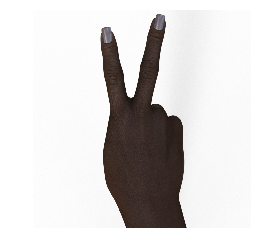

scissors-hires1.png is identified as scissor
scissors-hires2.png
[[0. 0. 1.]]


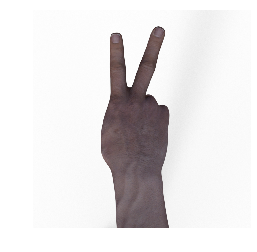

scissors-hires2.png is identified as scissor


In [21]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)
  result = np.argmax(classes[0])
  #print(result)
  img = mpimg.imread(path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()
  if result == 0:
    print(path + " is identified as paper")
  elif result == 1:
    
    print(path + " is identified as rock")
  else:
    print(path + " is identified as scissor")